<a href="https://colab.research.google.com/github/sumangupta87/Telecom-Churn-Prediction---Kaggle-Competition/blob/b3/Telecom_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Data Collection



https://towardsdatascience.com/machine-learning-case-study-telco-customer-churn-prediction-bc4be03c9e1d

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

Exploratory Data Analysis
1. EDA - Understanding the Data

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
for i in df.columns:
  print("Unique {}'s count: {}".format(i,df[i].nunique()))
  print("Unique {}'s values are: {}".format(i,df[i].unique()))

Unique customerID's count: 7043
Unique customerID's values are: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique gender's count: 2
Unique gender's values are: ['Female' 'Male']
Unique SeniorCitizen's count: 2
Unique SeniorCitizen's values are: [0 1]
Unique Partner's count: 2
Unique Partner's values are: ['Yes' 'No']
Unique Dependents's count: 2
Unique Dependents's values are: ['No' 'Yes']
Unique tenure's count: 73
Unique tenure's values are: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique PhoneService's count: 2
Unique PhoneService's values are: ['No' 'Yes']
Unique MultipleLines's count: 3
Unique MultipleLines's values are: ['No phone service' 'No' 'Yes']
Unique InternetService's count: 3
Unique InternetService's values are: ['DSL' 'Fiber optic' 'No']
Unique Onlin

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')
df['tenure'] = df['tenure'].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Renaming the data values of "PaymentMenthod" for better readability.

payment_column = {'Electronic check':'E-Check', 'Mailed check': 'Mailed Check','Bank transfer (automatic)': 'Bank Transfer', 'Credit card (automatic)': 'Credit Card'}
df['PaymentMethod'].replace(payment_column, inplace = True)

In [10]:
df['PaymentMethod'].unique()

array(['E-Check', 'Mailed Check', 'Bank Transfer', 'Credit Card'],
      dtype=object)

In [11]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df.shape

(7043, 21)

In [13]:
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0.0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank Transfer,52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed Check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0.0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed Check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed Check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0.0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit Card,56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed Check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed Check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed Check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed Check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0.0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed Check,73.35,NaN,No


In [14]:
df.dropna(0,'any',inplace = True)

<ipython-input-14-a1ec45a0bfb5>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df.dropna(0,'any',inplace = True)


In [15]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data Exploration

In [16]:
# Apply the fivethirtyeight style to all plots
plt.style.use("fivethirtyeight")

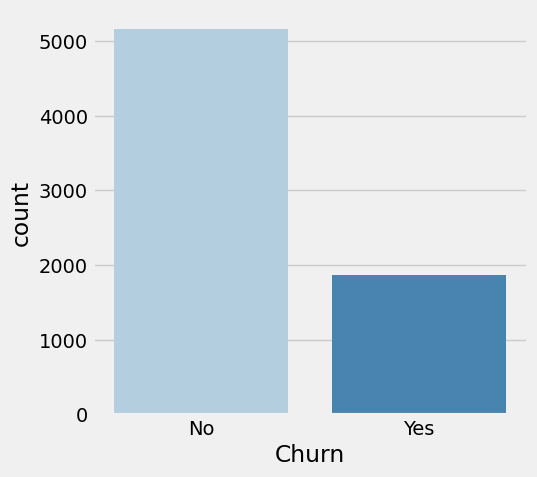

In [17]:
# Display frequency distribution for churn
plt.figure(figsize = (5,5))
ax = sns.countplot(x=df['Churn'], palette = "Blues", linewidth = 1)

The plot shows a class imbalance of the data between churners and non-churners. To address this, resampling would be a suitable approach. To keep this case simple, the imbalance is kept forward and specific metrics are chosen for model evaluations.



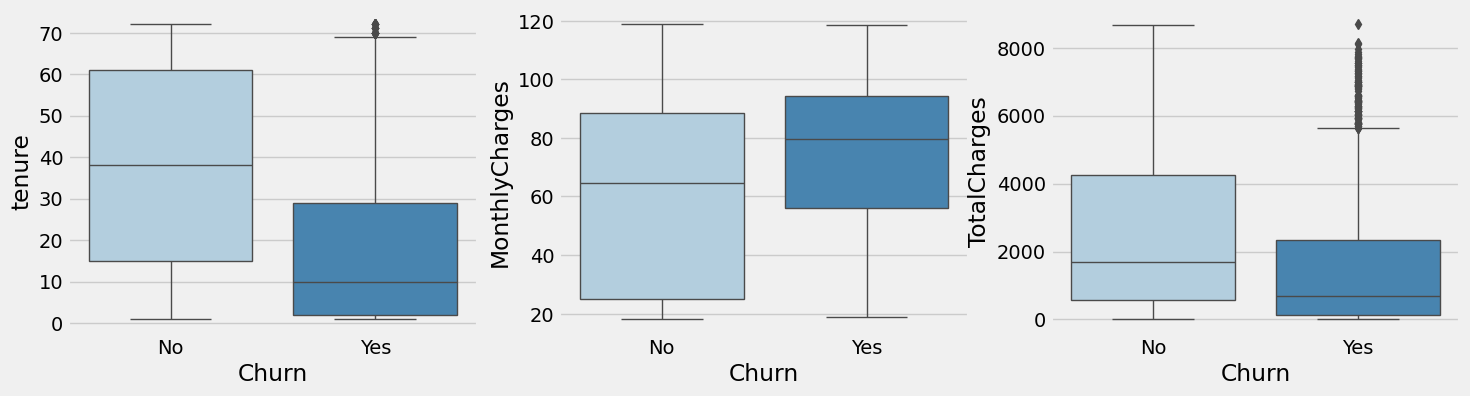

In [18]:
plt.figure(figsize=(16, 4))
plt.subplot(1,3,1)
sns.boxplot(x=df['Churn'], y = df['tenure'], palette = "Blues", linewidth = 1)
plt.subplot(1,3,2)
sns.boxplot(x=df['Churn'], y = df['MonthlyCharges'], palette = "Blues", linewidth = 1)
plt.subplot(1,3,3)
sns.boxplot(x=df['Churn'], y = df['TotalCharges'], palette = "Blues", linewidth = 1)

plt.show()

**Plot insights:**

1. Churning customers have much lower tenure with a median of ca. 10
   months compared to a median of non-churners of ca. 38 months.
2. Churning customers have higher monthly charges with a median of ca.
   80 USD and much lower interquartile range compared to that of non-churners (median of ca. 65 USD).
3. TotalCharges are the result of tenure and MonthlyCharges, which are
   more insightful on an individual basis.

In [19]:
# create a function to generate count plots

def count_plot(label,feat, df):
  plt.figure(figsize=(22, 18))
  if len(feat)%3 == 0:
    m = int(len(feat)/3)
  else:
    m = int((len(feat)//3)+1)

  for i,j in enumerate(feat):
    plt.subplot(m,3,i+1)
    ax = sns.countplot(data = df, x=j, hue = label, alpha = 0.8, linewidth = 0.4, palette = "Blues", edgecolor = 'black')
    ax.set_title(j)

  return plt.show()



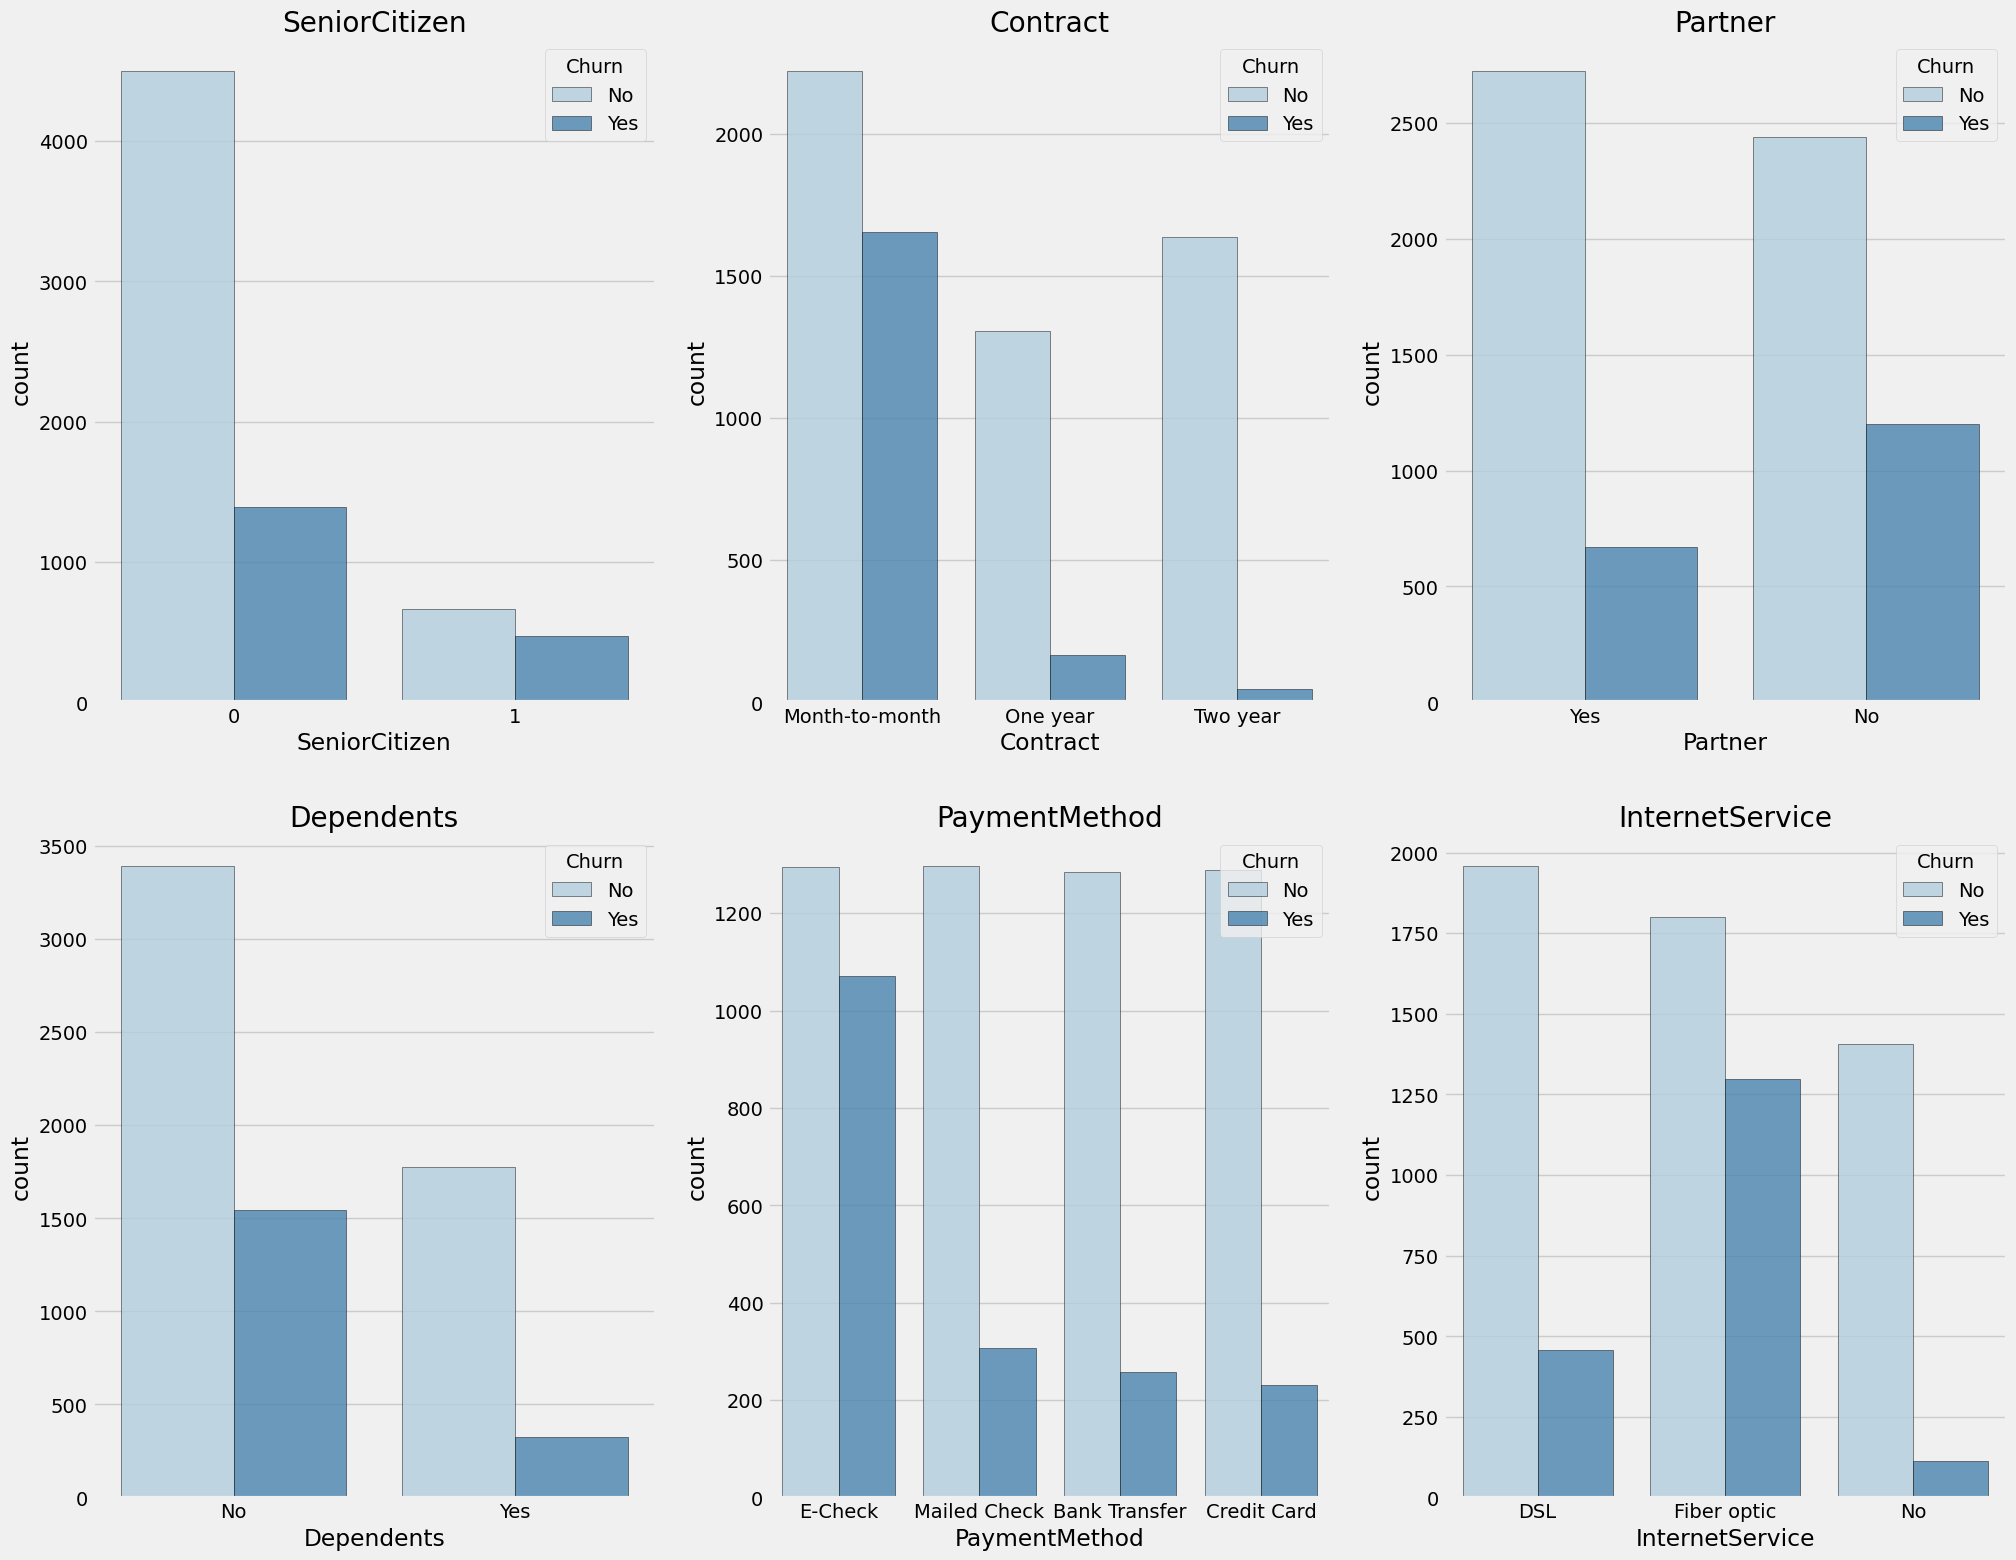

In [20]:
count_plot("Churn",['SeniorCitizen','Contract','Partner','Dependents','PaymentMethod','InternetService'],df)

**Plot insights:**

1.   Senior citizens churn rate is much higher than non-senior churn
     rate.
2.   Churn rate for month-to-month contracts much higher that for other
     contract durations.
3.   Moderately higher churn rate for customers without partners.
4.   Much higher churn rate for customers without children.
5.   Payment method electronic check shows much higher churn rate than
     other payment methods.
6.   Customers with InternetService fiber optic as part of their
     contract have much higher churn rate.





In [21]:
#df.plot(kind='box', subplots=True, layout=(10,2), sharex=False, sharey=False,figsize=(20, 40))
#plt.show()

In [22]:
# check of outliers by applying the IQR method checking if values are way outside the IQR boarders

numerical_feature = ["tenure", "MonthlyCharges","TotalCharges"]
df_num = df[numerical_feature]
df_num.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [23]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR

tenure              46.0000
MonthlyCharges      54.2750
TotalCharges      3393.2875
dtype: float64

In [24]:
((df_num < (Q1 - 1.5*IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

No outliers in numerical features detected with the IQR method — no adjustments made.

In [25]:
# Data Cleaning
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Feature Engineering Actions**

Columns removed - customerID: not relevant

No action - SeniorCitizen

Label encoding The following features are categorical and each take on 2 values (mostly yes/no) — therefore are transformed to binary integers
gender

*   Partner
*   Dependents
*   Churn
*   PhoneService
*   PaperlessBilling

One-Hot Encoding The following features are categorical, yet not ordinal (no ranking) but take on more than 2 values. For each value, a new variable is created with a binary integer indicating if the value occured in a data entry or not (1 or 0).

*   MultipleLines
*   InternetService
*   OnlineSecurity
*   OnlineBackup
*   DeviceProtection
*   TechSupport
*   StreamingTV
*   StreamingMovies
*   Contract
*   PaymentMethod


Min-Max Scaling Values of numerical features are rescaled between a range of 0 and 1. Min-max scaler is the standard approach for scaling. For normally distributed features standard scaler could be used, which scales values around a mean of 0 and a standard deviation of 1. For simplicity we use min-max scaler for all numerical features.

*   tenure
*   TotalCharges
*   MonthlyCharges


Feature Engineering - Feature Selection / Generation

In [26]:
# drop customer id
df = df.drop(columns = 'customerID')


In [27]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed Check,56.95,1889.50,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed Check,53.85,108.15,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Transfer,42.30,1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,Yes


In [28]:
# generate new feature "Number_AdditionalServices" by summing up the number of add-on services consumed.

df['Number_AdditionalServices'] = (df[['OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']] == "Yes").sum(axis = 'columns')

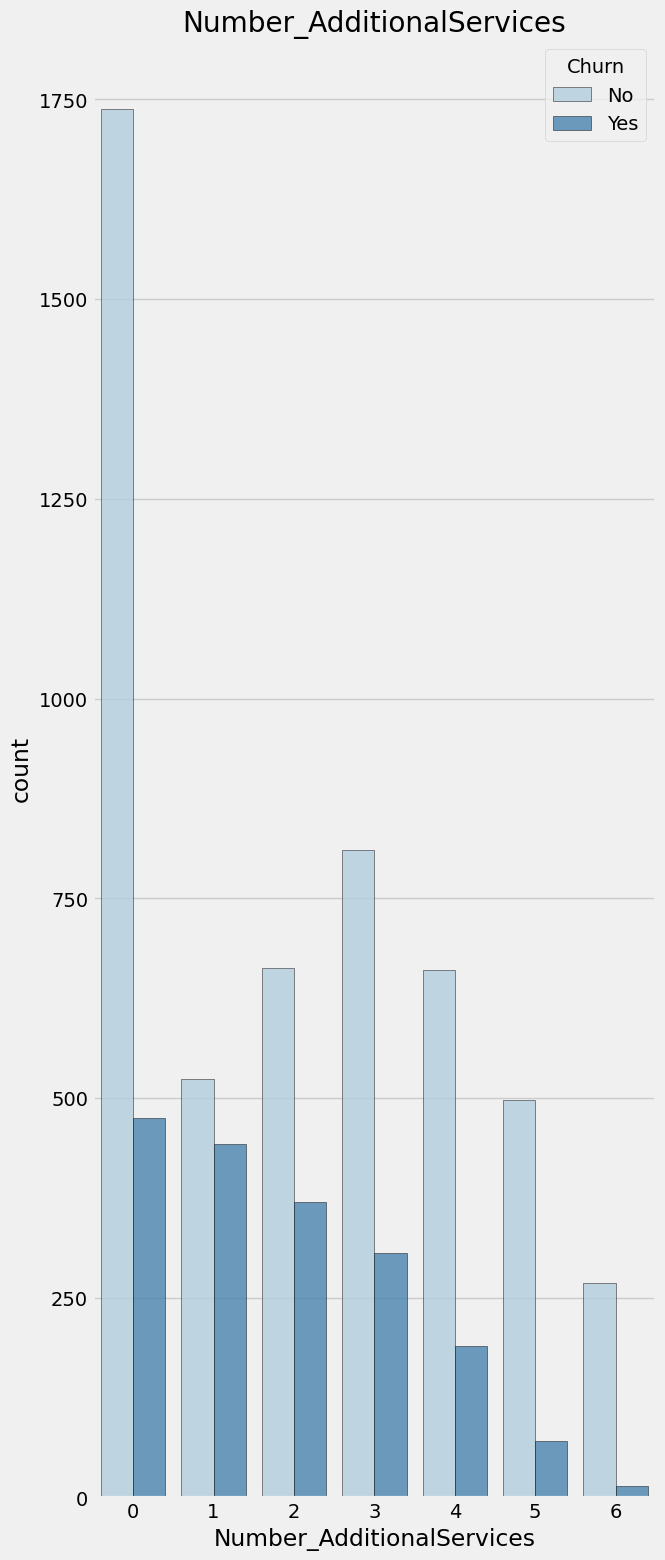

In [29]:
count_plot('Churn',['Number_AdditionalServices'], df)

**Plot insights:**

The countplot shows a very high churn rate for customers that have 1 additional service.
Customers with a very high number of additional services do have a low churn rate.

Label encoding

In [30]:
feature_le = ['gender','Partner','Dependents','Churn', 'PhoneService', 'PaperlessBilling']

def label_encoding(feature, df):
  for i in feature:
    df[i] = df[i].map({'Yes':1, 'No':0})
  return

label_encoding(['Partner','Dependents','Churn', 'PhoneService', 'PaperlessBilling'], df)

df['gender'] = df['gender'].map({'Female':1,'Male': 0})



One-Hot Encoding

In [31]:
feature_ohe = ['MultipleLines', 'InternetService', 'OnlineSecurity',
'OnlineBackup', 'DeviceProtection', 'TechSupport',
'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']

df = pd.get_dummies(df, columns = feature_ohe, drop_first = True)

In [32]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit Card,PaymentMethod_E-Check,PaymentMethod_Mailed Check
0,1,0,1,0,1.0,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,34.0,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,2.0,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,45.0,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,2.0,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


<Axes: >

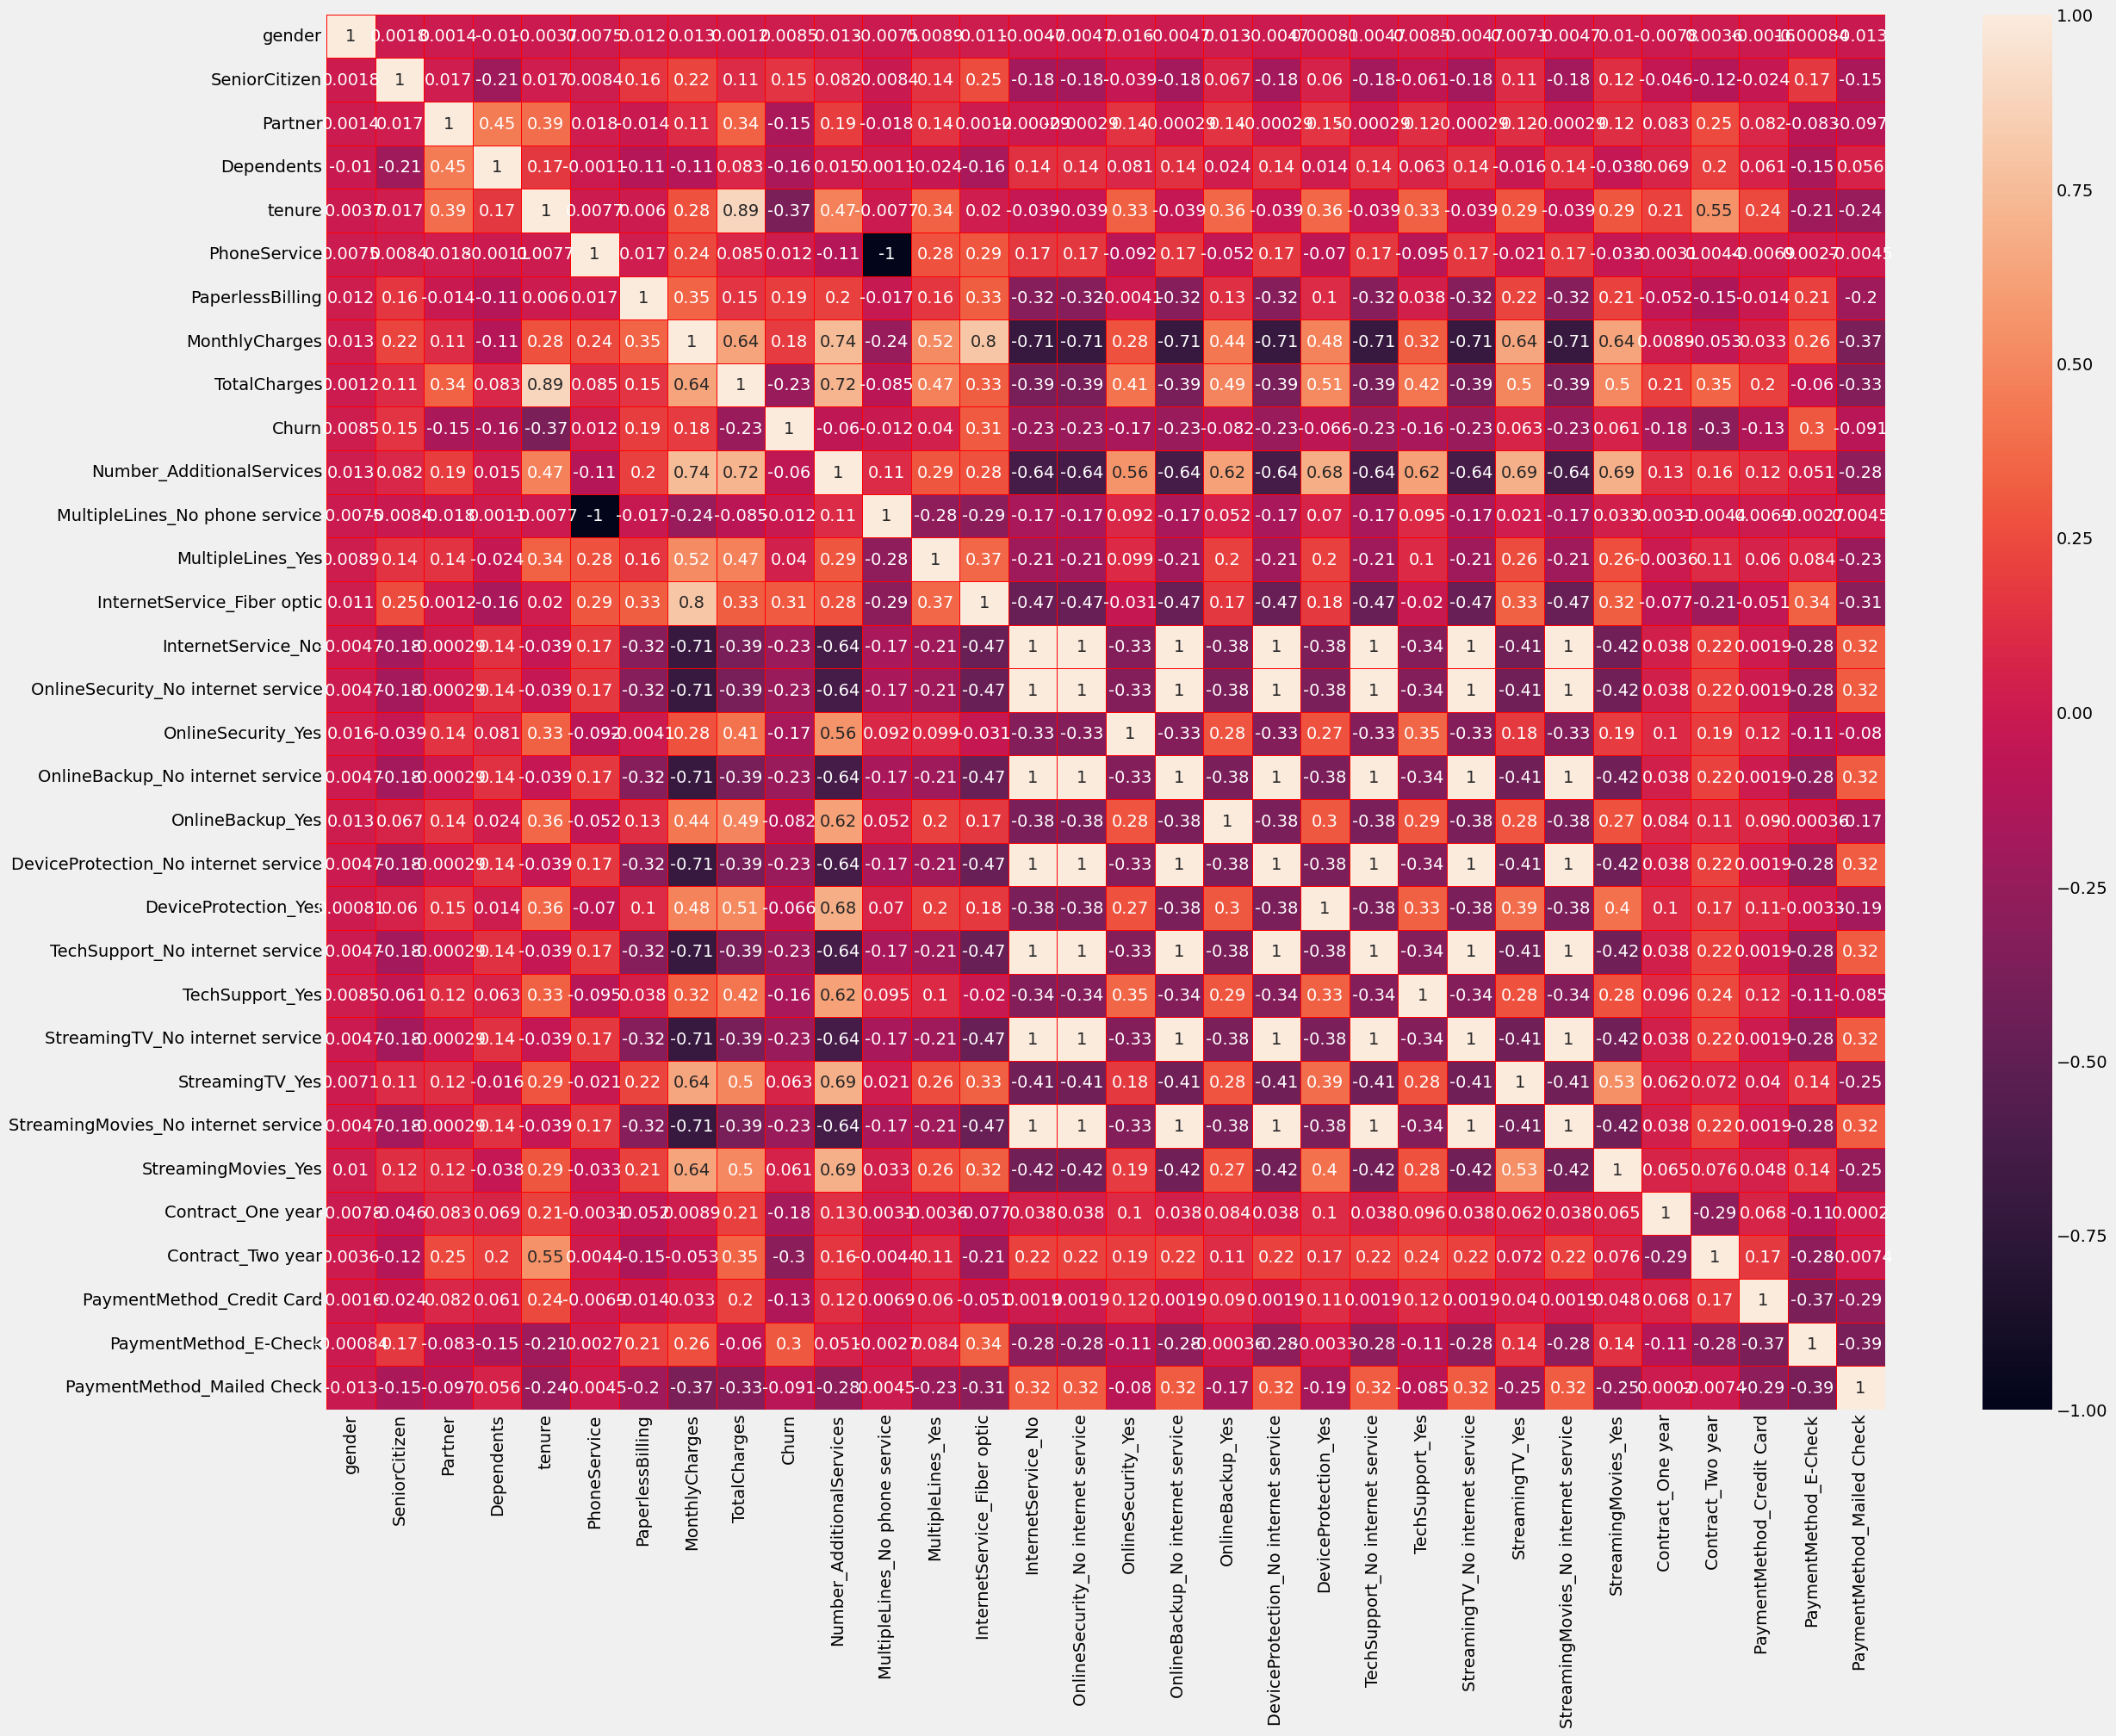

In [33]:
plt.figure(figsize = (26, 20))
sns.heatmap(df.corr(method = 'spearman'), annot = True,linewidths=0.5,linecolor='r')

<Axes: >

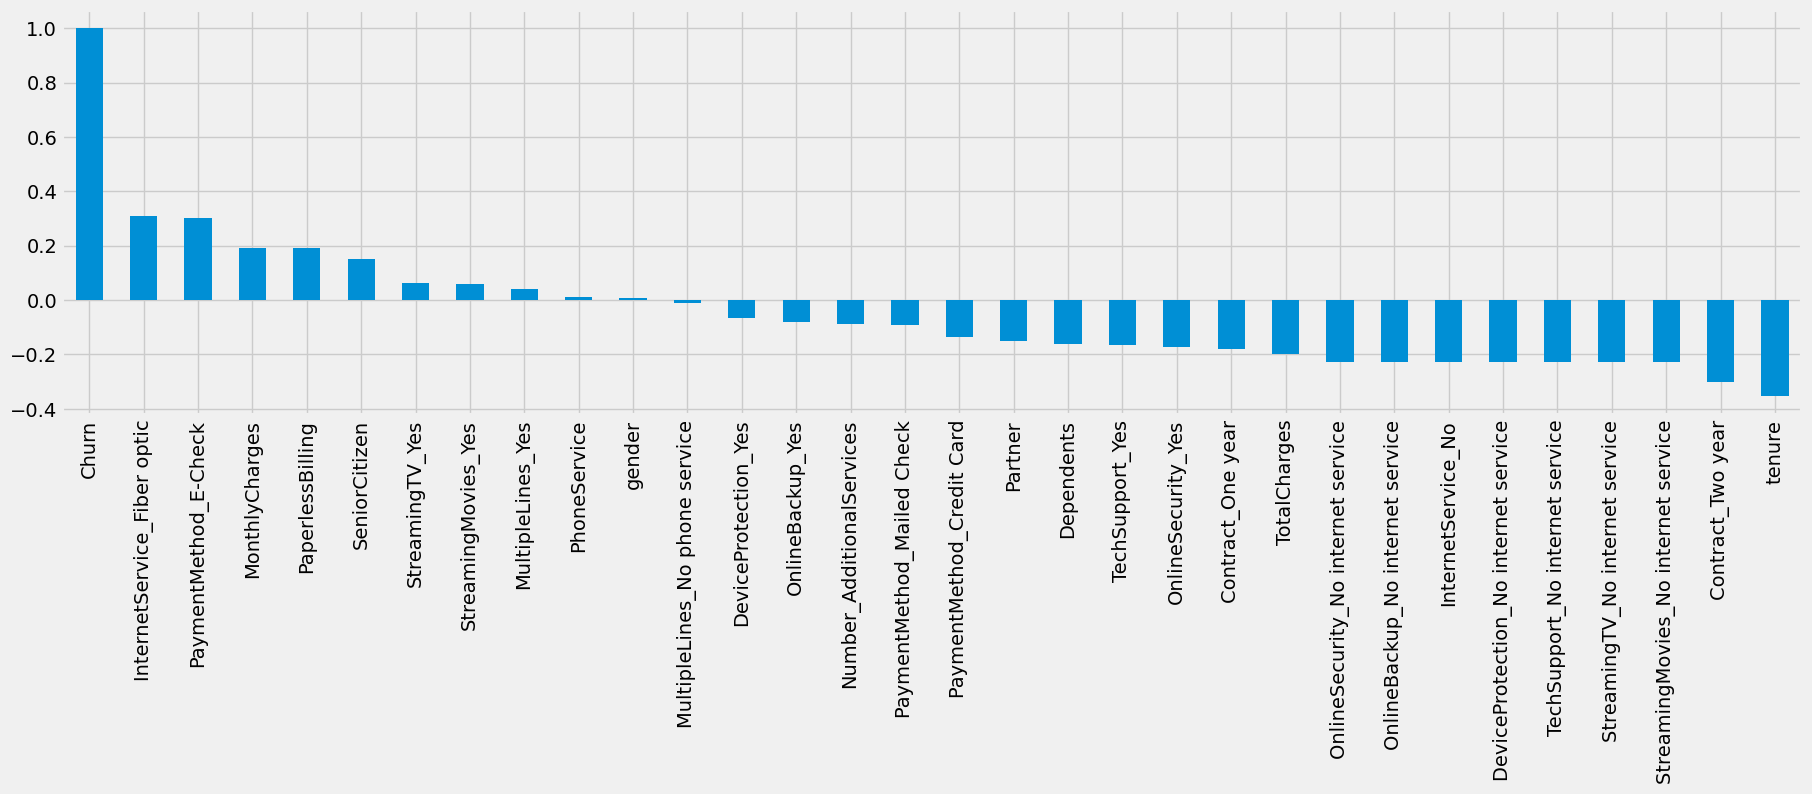

In [34]:
plt.figure(figsize = (16,10))
df.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar', figsize = (20,5))

Train - Test Split

In [35]:
from sklearn.model_selection import train_test_split


X1 = df.drop('Churn', axis = 1)
y = df['Churn']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.2, random_state = 42)


**Feature Min-Max-Scaling**

In [36]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
features_mms = ['tenure', 'MonthlyCharges', 'TotalCharges']

#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()




In [37]:
X1_train[features_mms] = mms.fit_transform(X1_train[features_mms])
X1_test[features_mms] = mms.transform(X1_test[features_mms])

Correlation

In [38]:
X_train = X1_train.values
X_test = X1_test.values

In [39]:
y_train, y_test = y1_train.values, y1_test.values

**Model Evaluation Metrics**

**Feature weights:** Indicates the top features used by the model to generate the predictions

**Confusion matrix:** Shows a grid of true and false predictions compared to the actual values

**Accuracy score:** Shows the overall accuracy of the model for training set and test set

**ROC Curve:** Shows the diagnostic ability of a model by bringing together true positive rate (TPR) and false positive rate (FPR) for different thresholds of class predictions (e.g. thresholds of 10%, 50% or 90% resulting to a prediction of churn)

**AUC (for ROC):** Measures the overall separability between classes of the model related to the ROC curve

**Precision-Recall-Curve:** Shows the diagnostic ability by comparing false positive rate (FPR) and false negative rate (FNR) for different thresholds of class predictions. It is suitable for data sets with high class imbalances (negative values overrepresented) as it focuses on precision and recall, which are not dependent on the number of true negatives and thereby excludes the imbalance

**F1 Score:** Builds the harmonic mean of precision and recall and thereby measures the compromise between both.

**AUC (for PRC):** Measures the overall separability between classes of the model related to the Precision-Recall curve

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, ConfusionMatrixDisplay, precision_score, recall_score


In [41]:
# Define function that plots the feature weights for a classifier

def feature_weights(X_df, classifier, calssifier_name):
  weights = pd.Series(classifier.coef_[0],index = X_df.columns.values).sort_values(ascending = False)
  top_weights_selected = weights[:10]
  plt.figure(figsize = (7,6))
  plt.tick_params(labelsize = 10)
  #plt.xlabel(fontsize = 10)
  plt.title(f'{calssifier_name} - Top 10 Feature')
  top_weights_selected.plot(kind = "bar")

  bottom_weights_selected = weights[-10:]
  plt.figure(figsize = (7,6))
  plt.tick_params(labelsize = 10)
  #plt.xlabel(fontsize = 10)
  plt.title(f'{calssifier_name} - Bottom 10 Feature')
  bottom_weights_selected.plot(kind = "bar")

  return print("")




In [42]:
# define a function that plots the confusion matrix for a classifier and the train and test accuracy

def confusion_matrix_plot(X_train,y_train,X_test, y_test, classifier, y_pred, classifier_name):
  fig, ax = plt.subplots(figsize = (7,6))
  ConfusionMatrixDisplay.from_estimator(classifier,X_test,y_test, display_labels=["No Churn", "Churn"], cmap = plt.cm.Blues, normalize = None, ax = ax)
  ax.set_title(f'{classifier_name} - Confusion Matrix')
  plt.show()

  fig, ax = plt.subplots(figsize = (7,6))
  ConfusionMatrixDisplay.from_estimator(classifier,X_test,y_test, display_labels=["No Churn", "Churn"], cmap = plt.cm.Blues, normalize = 'true', ax = ax)
  ax.set_title(f'{classifier_name} - Confusion Matrix (Norm.)')
  plt.show()

  print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
  print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')
  return print("")


In [43]:
# define function that plots the ROC curve and AUC score

def roc_curve_auc_score(X_test, y_test, y_pred_probalities, classifier_name):
  y_pred_prob = y_pred_probalities[:,1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
  plt.plot([0,1],[0,1], 'k--')
  plt.plot(fpr, tpr, label = f'{classifier_name}')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'{classifier_name} - ROC Curve')
  plt.show()
  return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')

In [44]:
# Define a function that plots the precision - recall - curve and the F1 score and AUC score

def precision_recall_curve_and_score(X_test, y_test, y_pred, y_pred_probalities, classifier_name):

  y_pred_prob = y_pred_probalities[:,1]
  precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

  plt.plot(recall,precision, label = f'{classifier_name}')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title(f'{classifier_name} - Precision - Recall Curve')
  plt.show()

  f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)

  return print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

**Model Selection, Training, Prediction and Assessment**

In [45]:
# K Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)


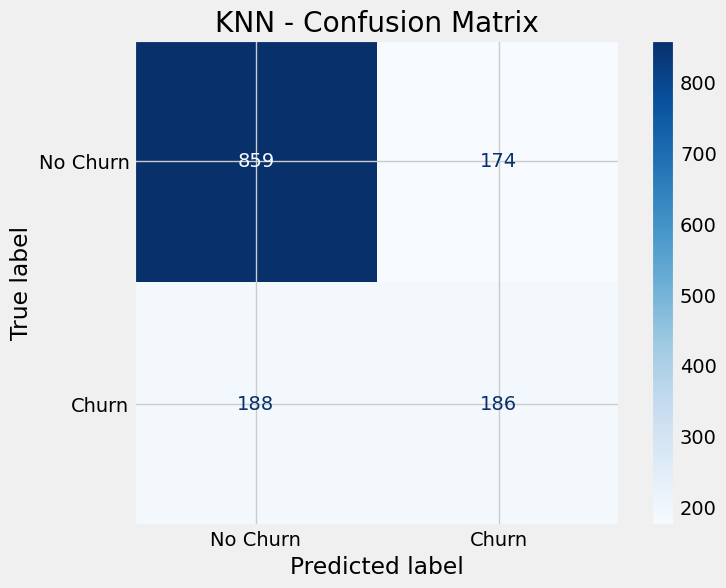

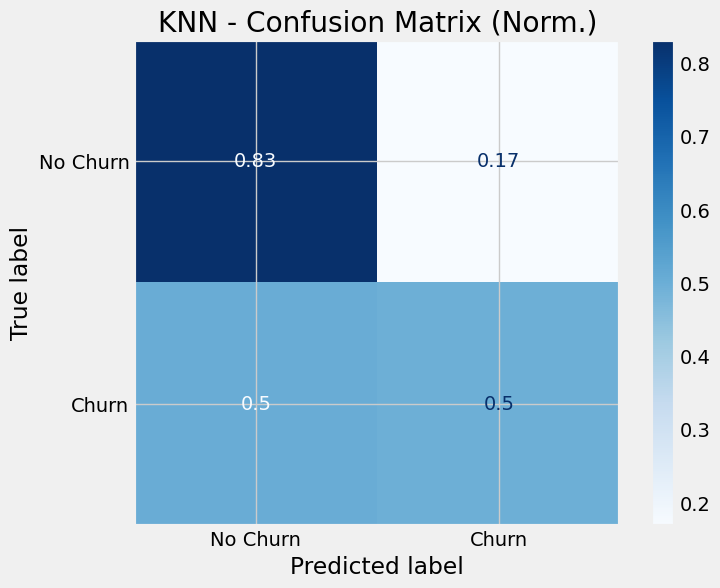

Accuracy Score Test: 0.7427149964463398
Accuracy Score Train: 0.8410666666666666 (as comparison)



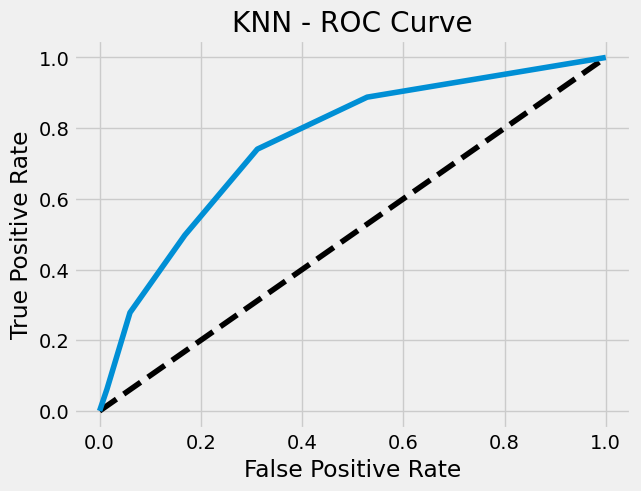

AUC Score (ROC): 0.7604091711488785



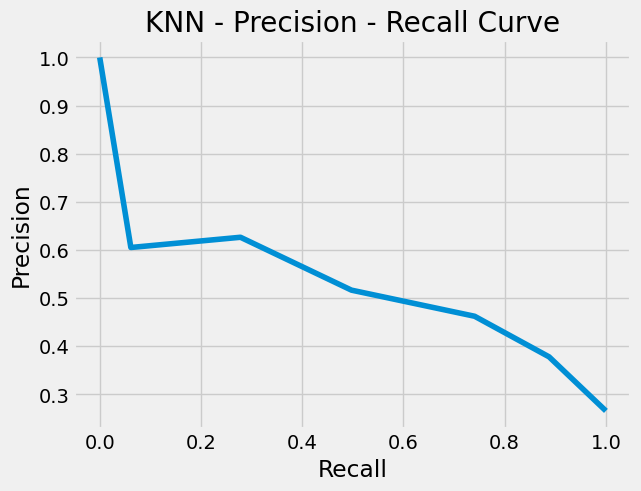

F1 Score: 0.5068119891008174 
AUC Score (PR): 0.5251471096826217



In [46]:
# Plot model evaluations

confusion_matrix_plot(X_train, y_train, X_test, y_test, knn, y_pred_knn, 'KNN')
roc_curve_auc_score(X_test, y_test, y_pred_knn_prob, 'KNN')

precision_recall_curve_and_score(X_test, y_test, y_pred_knn, y_pred_knn_prob, 'KNN')

**Logistic Regression**

In [47]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [48]:
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

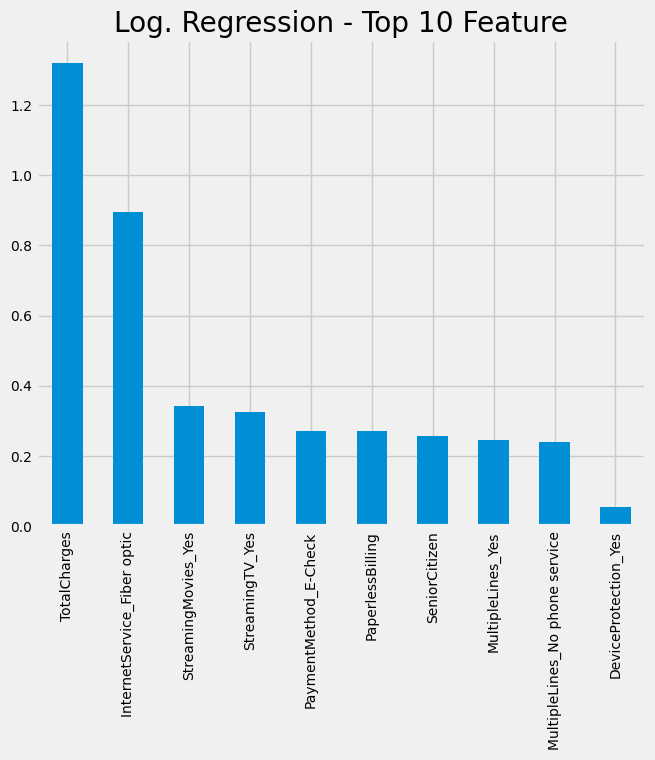

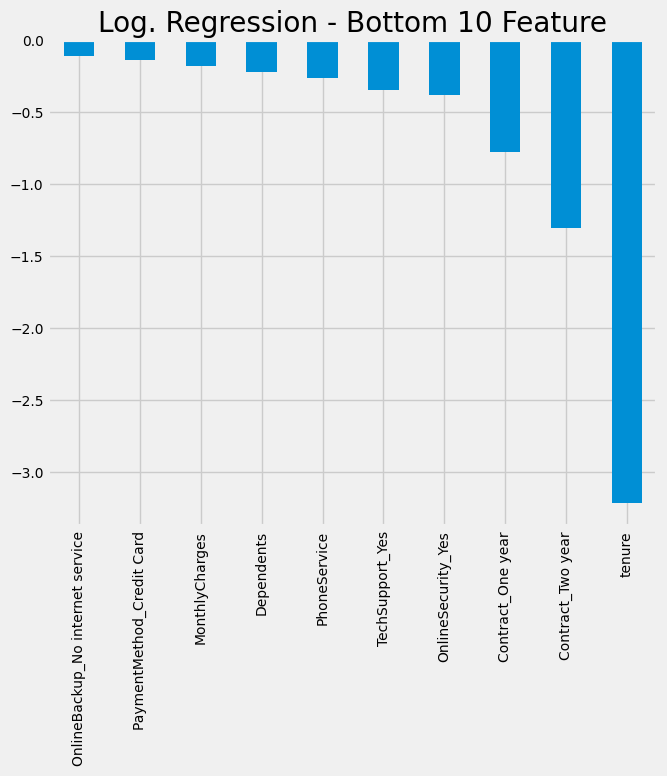

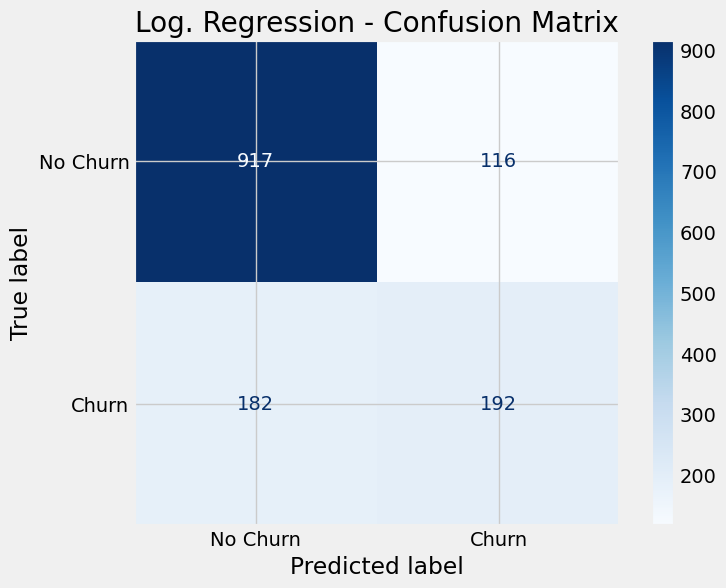

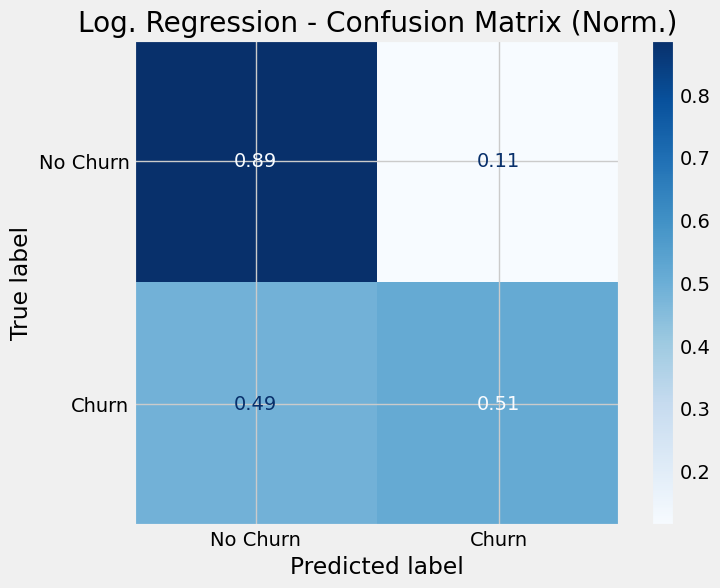

Accuracy Score Test: 0.7882018479033405
Accuracy Score Train: 0.8074666666666667 (as comparison)



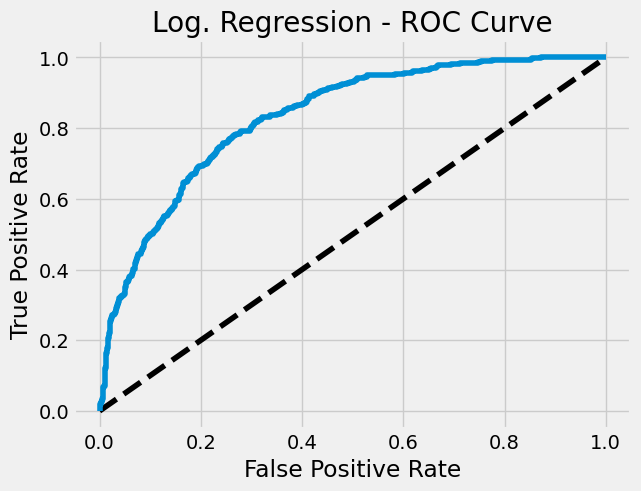

AUC Score (ROC): 0.8316905746721815



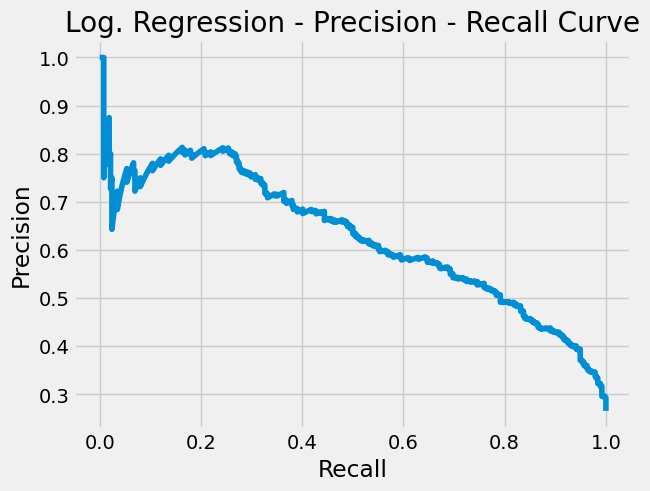

F1 Score: 0.5630498533724341 
AUC Score (PR): 0.627580448567143



In [49]:
# plot model evaluation

feature_weights(X1, logreg, 'Log. Regression')
confusion_matrix_plot(X_train, y_train,X_test, y_test, logreg, y_pred_logreg, 'Log. Regression')
roc_curve_auc_score(X_test, y_test, y_pred_logreg_prob, 'Log. Regression')
precision_recall_curve_and_score(X_test, y_test, y_pred_logreg, y_pred_logreg_prob, 'Log. Regression')

**Random Forrest**

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

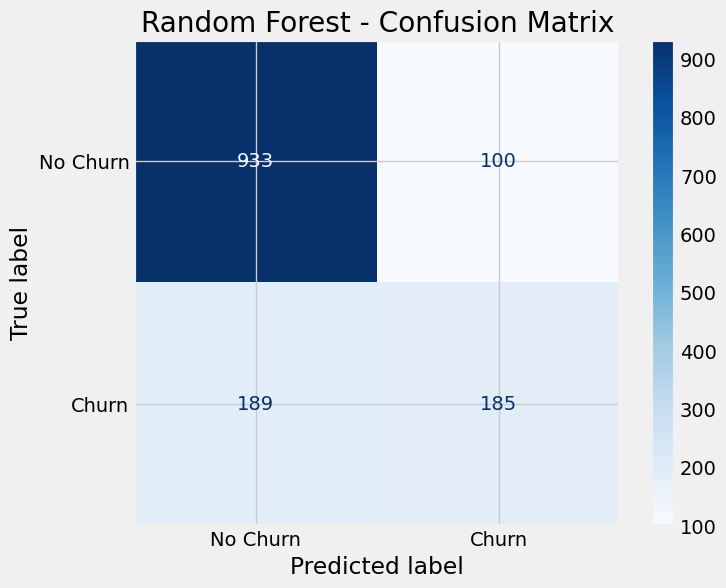

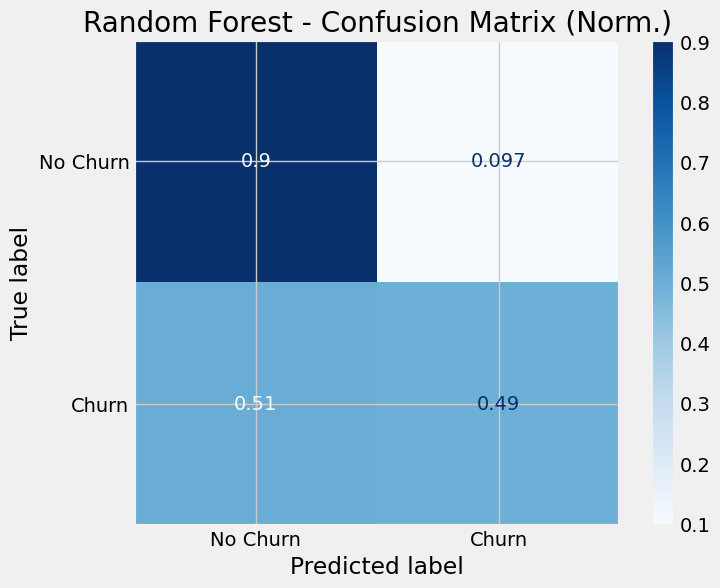

Accuracy Score Test: 0.7945984363894811
Accuracy Score Train: 0.9976888888888888 (as comparison)



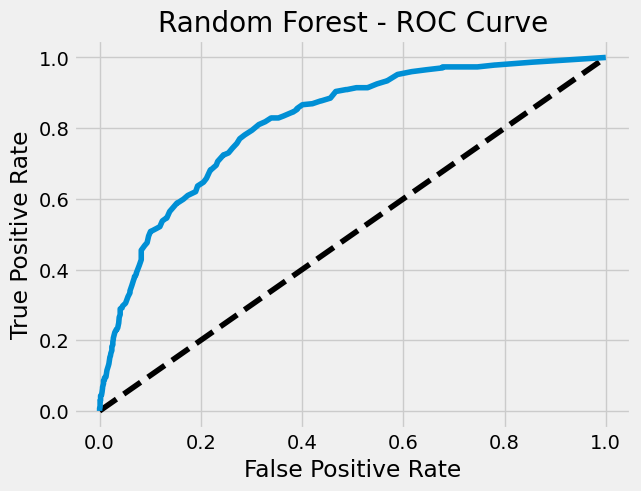

AUC Score (ROC): 0.8158134502590967



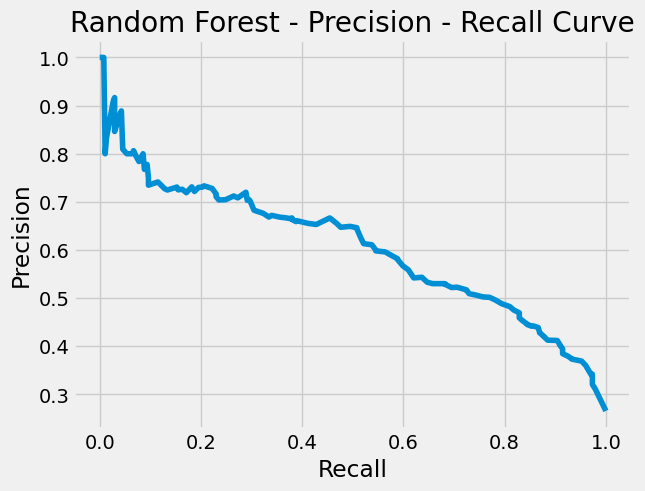

F1 Score: 0.5614567526555386 
AUC Score (PR): 0.6051955212208645



In [51]:

confusion_matrix_plot(X_train, y_train,X_test, y_test, rf, y_pred_rf, 'Random Forest')
roc_curve_auc_score(X_test, y_test, y_pred_rf_prob, 'Random Forest')
precision_recall_curve_and_score(X_test, y_test, y_pred_rf, y_pred_rf_prob, 'Random Forest')

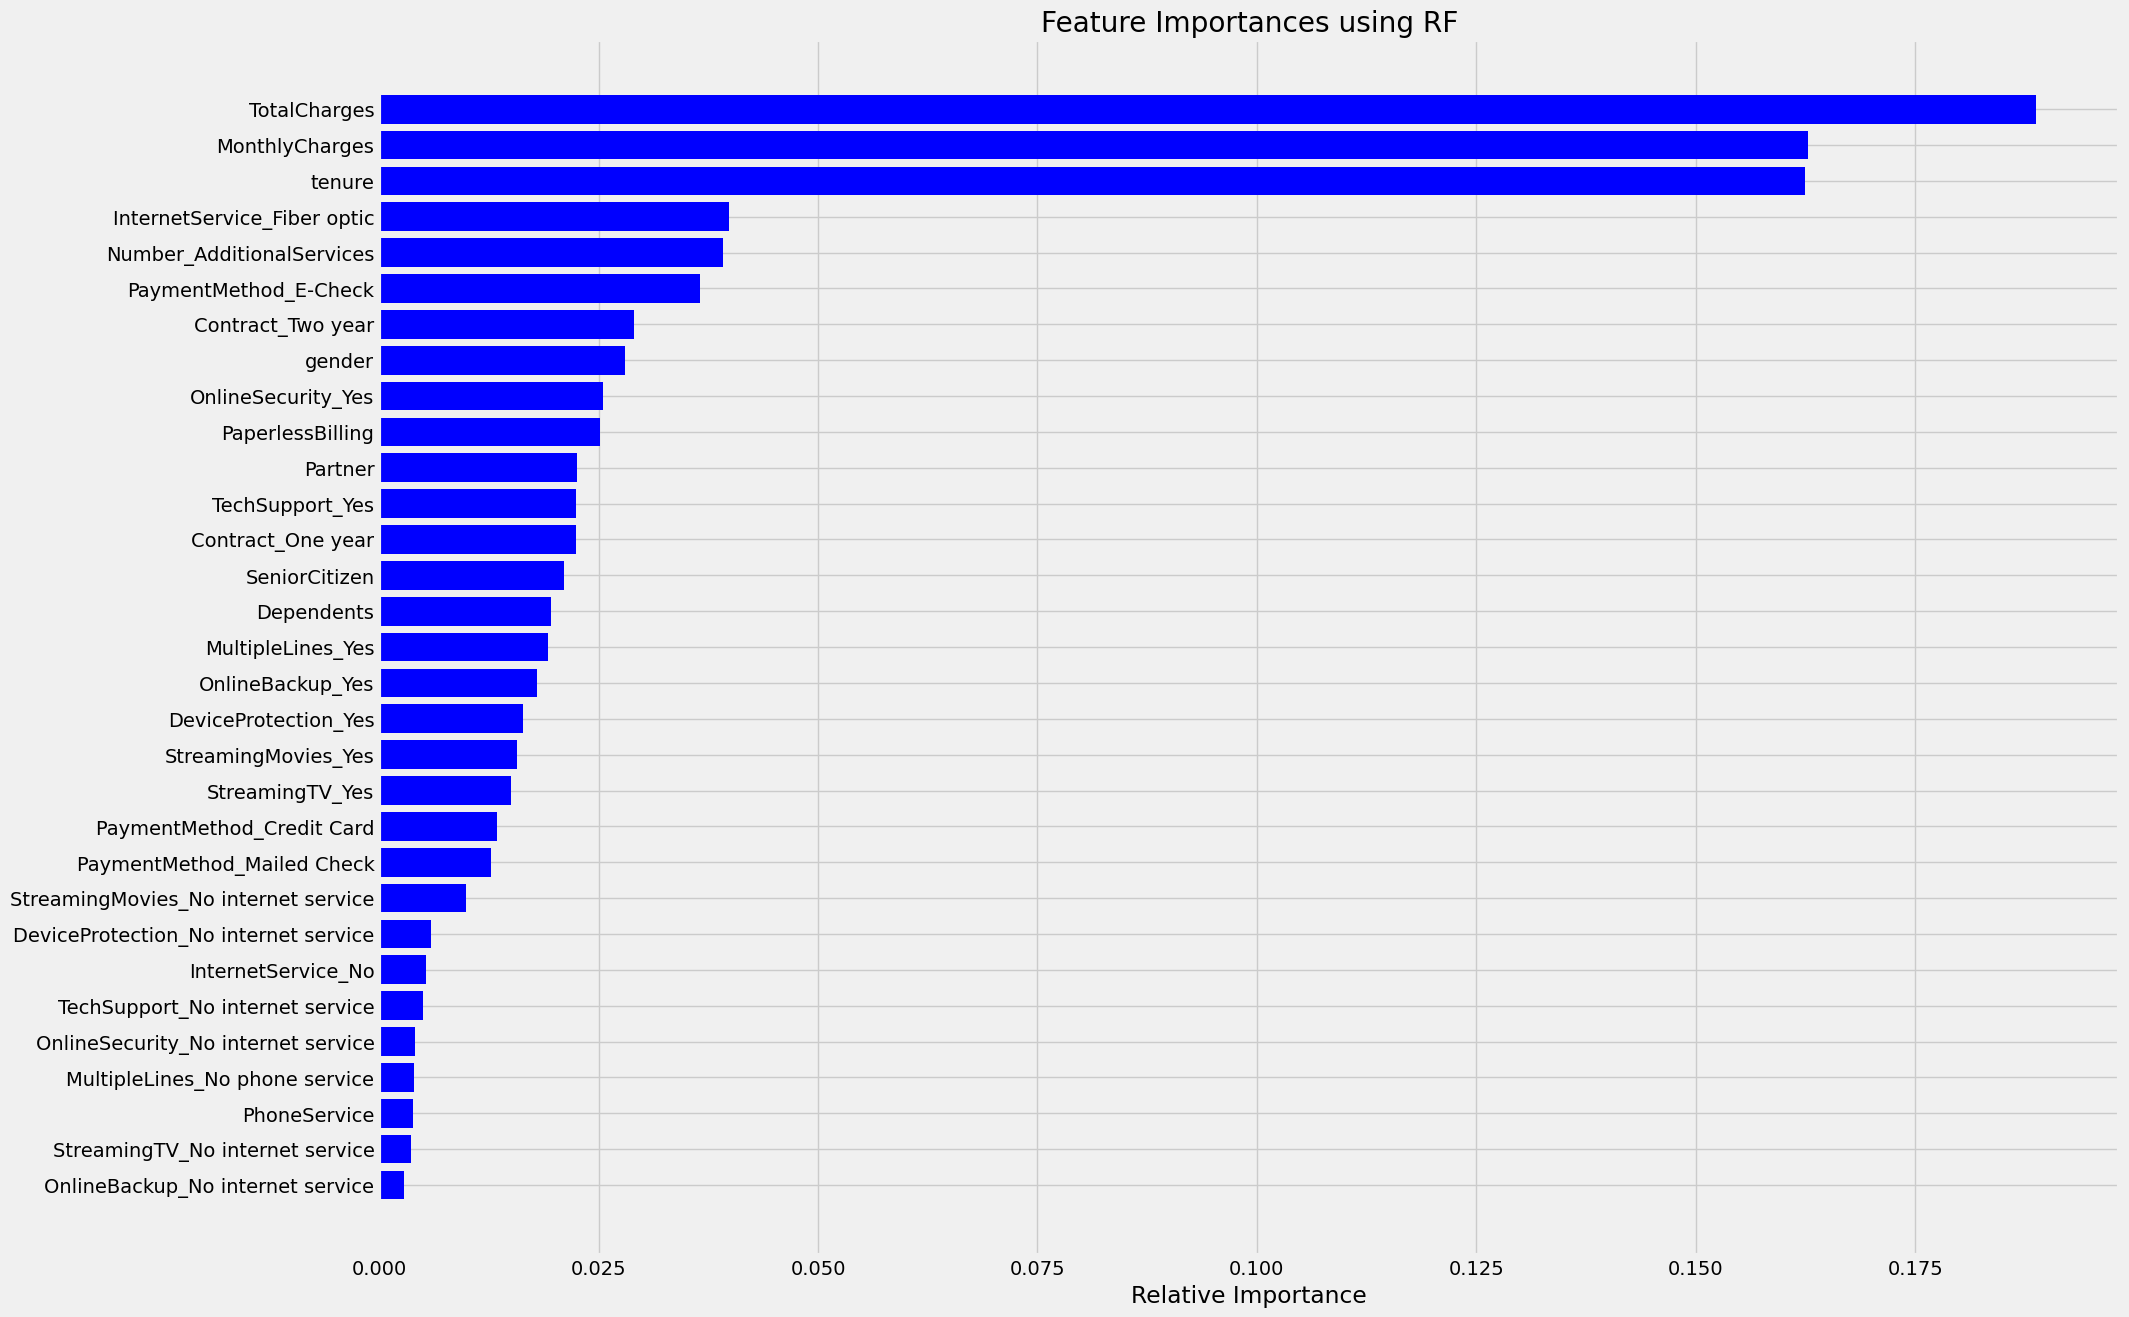

In [52]:
features = X1.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (20,15))
plt.title('Feature Importances using RF')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Support Vector Machine**

In [53]:
from sklearn.svm import SVC
support_vector_m = SVC(kernel = 'rbf', probability = True)
support_vector_m.fit(X_train, y_train)

y_pred_svm = support_vector_m.predict(X_test)
y_pred_svm_porb = support_vector_m.predict_proba(X_test)

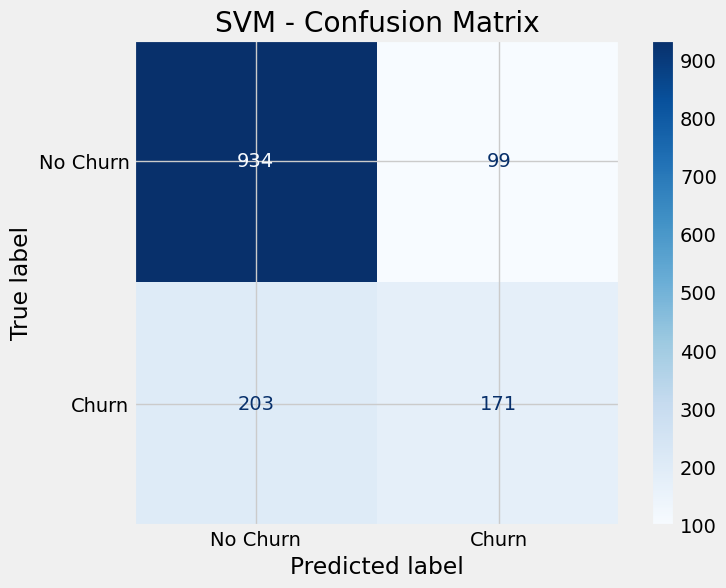

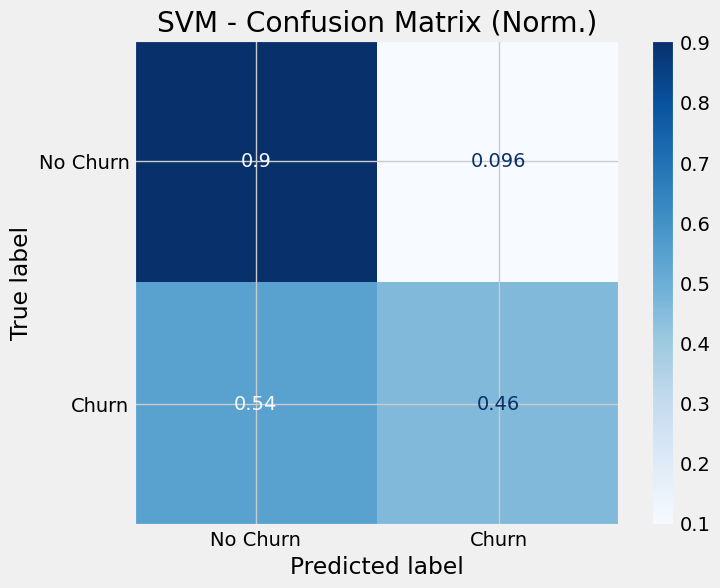

Accuracy Score Test: 0.7853589196872779
Accuracy Score Train: 0.8113777777777778 (as comparison)



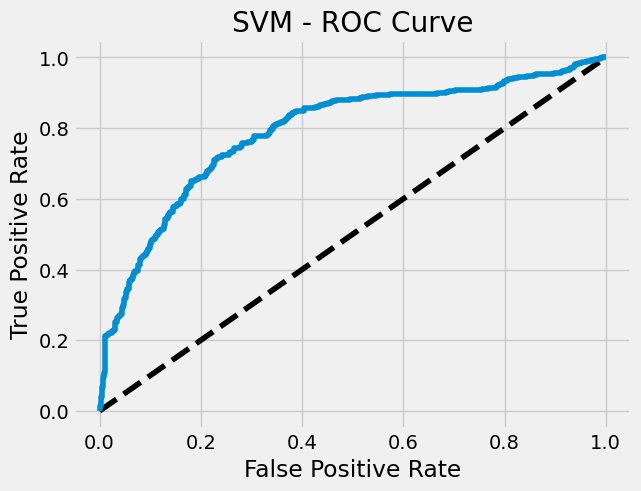

AUC Score (ROC): 0.7905870964068105



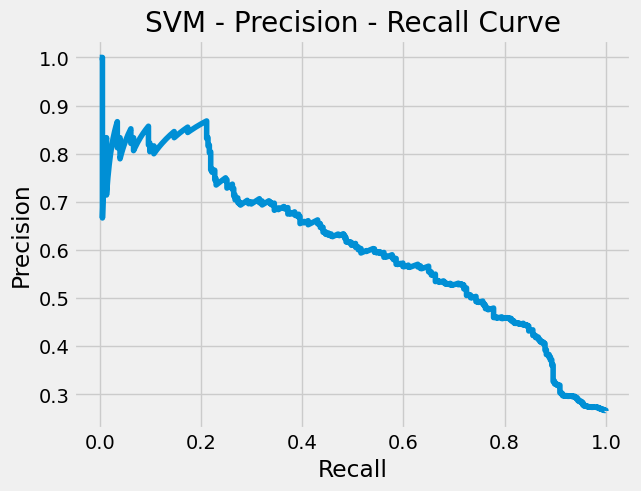

F1 Score: 0.531055900621118 
AUC Score (PR): 0.6087802330387032



In [54]:

confusion_matrix_plot(X_train, y_train,X_test, y_test, support_vector_m, y_pred_svm, 'SVM')
roc_curve_auc_score(X_test, y_test, y_pred_svm_porb, 'SVM')
precision_recall_curve_and_score(X_test, y_test, y_pred_svm, y_pred_svm_porb, 'SVM')

**Hyperparameter Tuning/Model Improvement**

**KNN(Optimized)**

In [55]:
from sklearn.model_selection import GridSearchCV

# K Nearest Neighbor
param_grid = {'n_neighbors': np.arange(1,30)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(X_train, y_train)

y_pred_knn_tunned = knn_cv.predict(X_test)
y_pred_knn_tunned_prob = knn_cv.predict_proba(X_test)

print('KNN best number of neighbors:', knn_cv.best_params_, '\n')


KNN best number of neighbors: {'n_neighbors': 24} 



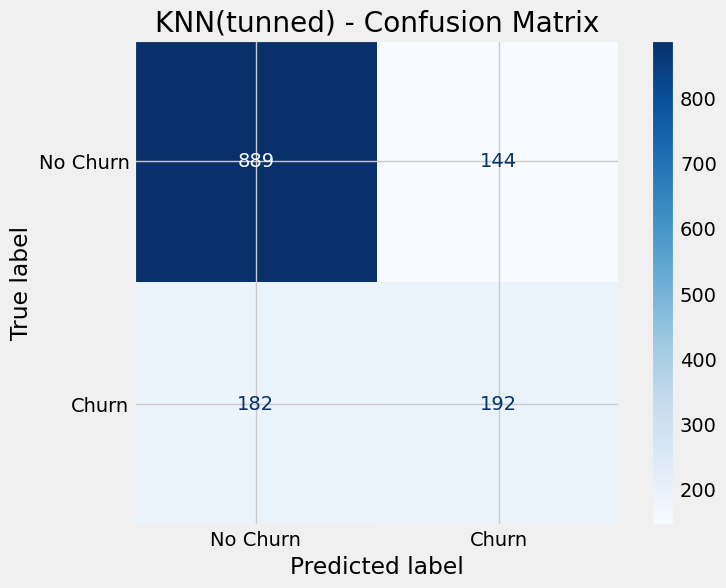

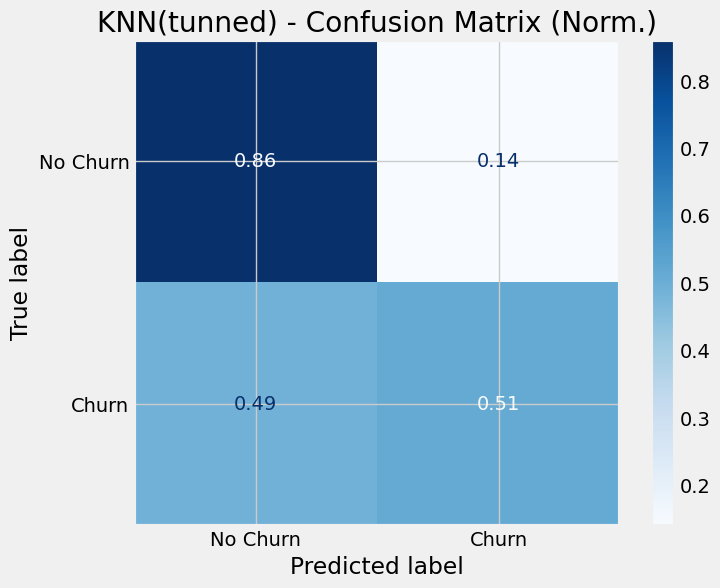

Accuracy Score Test: 0.7683013503909026
Accuracy Score Train: 0.8017777777777778 (as comparison)



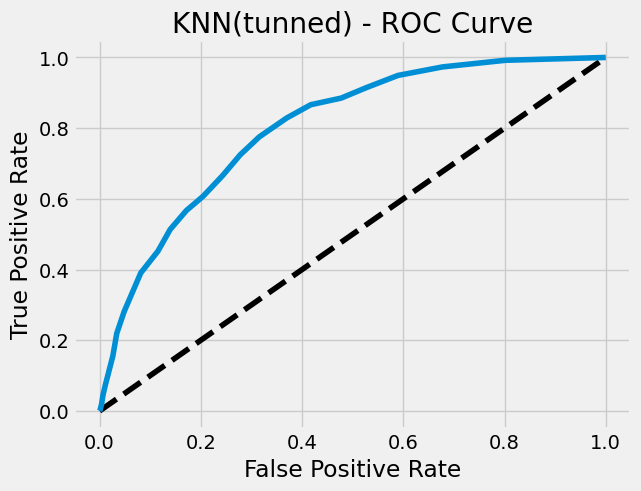

AUC Score (ROC): 0.8013055789947767



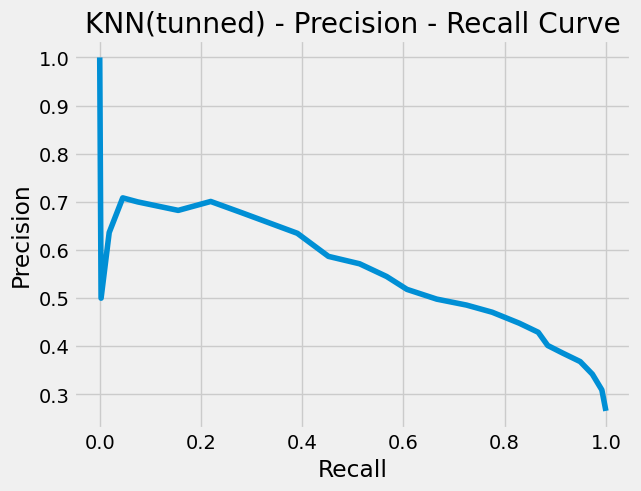

F1 Score: 0.5408450704225353 
AUC Score (PR): 0.5618037951254927



In [56]:
# Plot model evaluations

confusion_matrix_plot(X_train, y_train, X_test, y_test, knn_cv, y_pred_knn_tunned, 'KNN(tunned)')
roc_curve_auc_score(X_test, y_test, y_pred_knn_tunned_prob, 'KNN(tunned)')

precision_recall_curve_and_score(X_test, y_test, y_pred_knn_tunned, y_pred_knn_tunned_prob, 'KNN(tunned)')

**Logistic Regression(Optimized)**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Logistic Regression Best Parameter: {'C': 1.3000000000000003, 'penalty': 'l1'} 



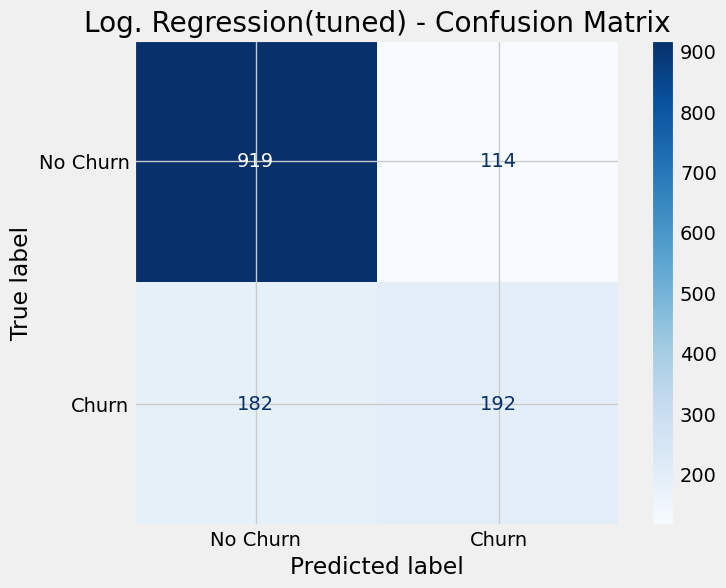

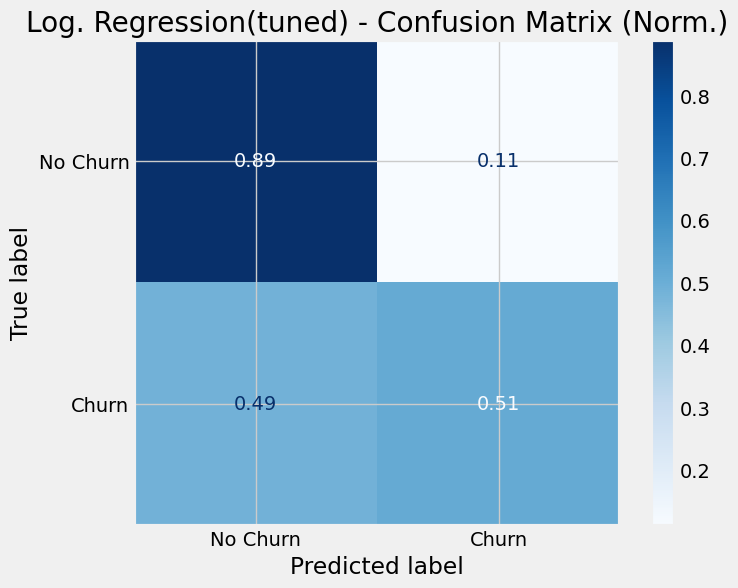

Accuracy Score Test: 0.7896233120113717
Accuracy Score Train: 0.8083555555555556 (as comparison)



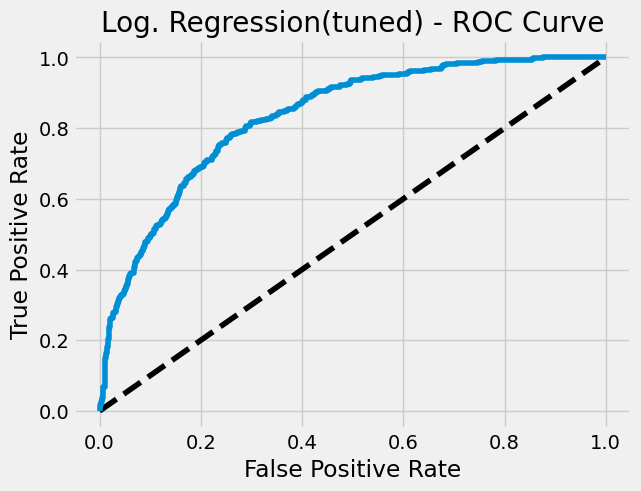

AUC Score (ROC): 0.8319752964989569



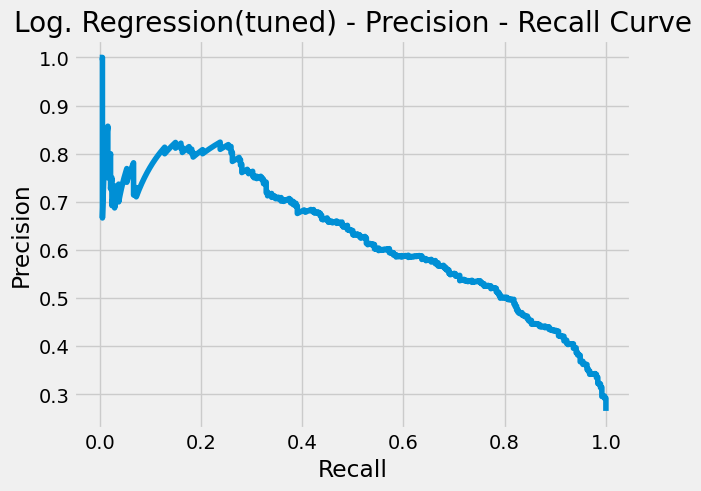

F1 Score: 0.5647058823529413 
AUC Score (PR): 0.628732093186518



In [57]:

param_grid_L1 = {'penalty':['l1','l2'], 'C': np.arange(.1,5,.1)}
logreg_tuned = LogisticRegression(solver = 'saga', max_iter = 1000)
logreg_tuned_gs = GridSearchCV(logreg_tuned, param_grid_L1, cv = 5)
logreg_tuned_gs.fit(X_train, y_train)

y_pred_logreg_tuned = logreg_tuned_gs.predict(X_test)
y_pred_logreg_tuned_prob = logreg_tuned_gs.predict_proba(X_test)

print('Logistic Regression Best Parameter:', logreg_tuned_gs.best_params_, '\n')


# plot model evaluation

confusion_matrix_plot(X_train, y_train,X_test, y_test, logreg_tuned_gs, y_pred_logreg_tuned, 'Log. Regression(tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_logreg_tuned_prob, 'Log. Regression(tuned)')
precision_recall_curve_and_score(X_test, y_test, y_pred_logreg_tuned, y_pred_logreg_tuned_prob, 'Log. Regression(tuned)')

**Random Forrest(Optimized)**

In [58]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = {'n_estimators': np.arange(1,2000,10),
                 'max_features': ['auto','sqrt'],
                 'max_depth': np.arange(10,200,10),
                 'criterion': ['gini','entropy'],
                 'bootstrap': [True, False]}

rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator = rf, param_distributions = param_grid_rf, cv = 5, verbose = 0)
rf_random_grid.fit(X_train, y_train)


y_pred_ef_tunned = rf_random_grid.predict(X_test)
y_pred_rf_tunned_prob = rf_random_grid.predict_proba(X_test)

print('Random forrest best parameters:', rf_random_grid.best_params_, '\n')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Random forrest best parameters: {'n_estimators': 1971, 'max_features': 'auto', 'max_depth': 60, 'criterion': 'entropy', 'bootstrap': True} 



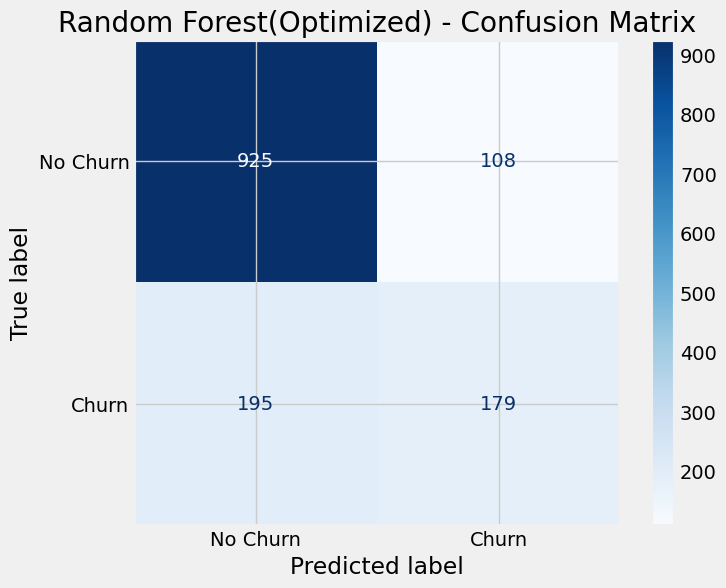

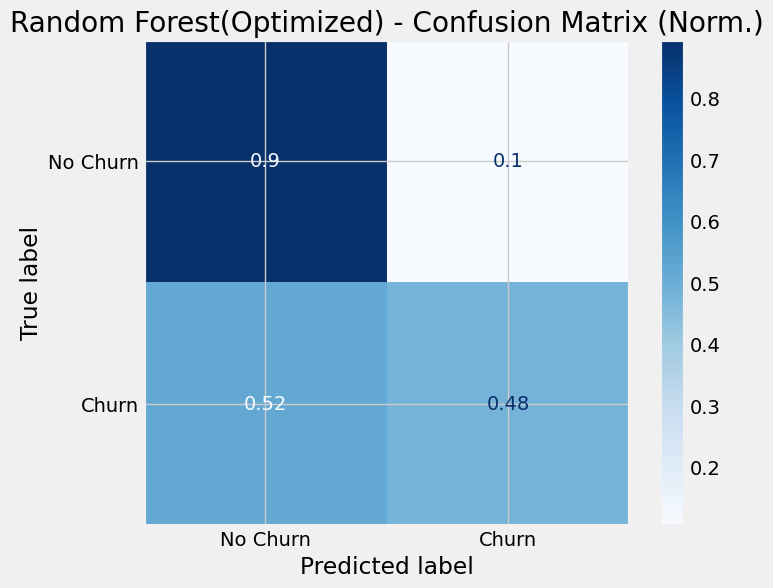

Accuracy Score Test: 0.7846481876332623
Accuracy Score Train: 0.9976888888888888 (as comparison)



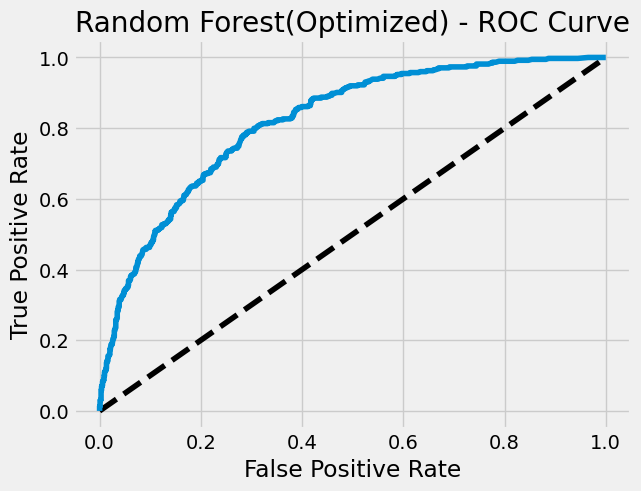

AUC Score (ROC): 0.8187758514476811



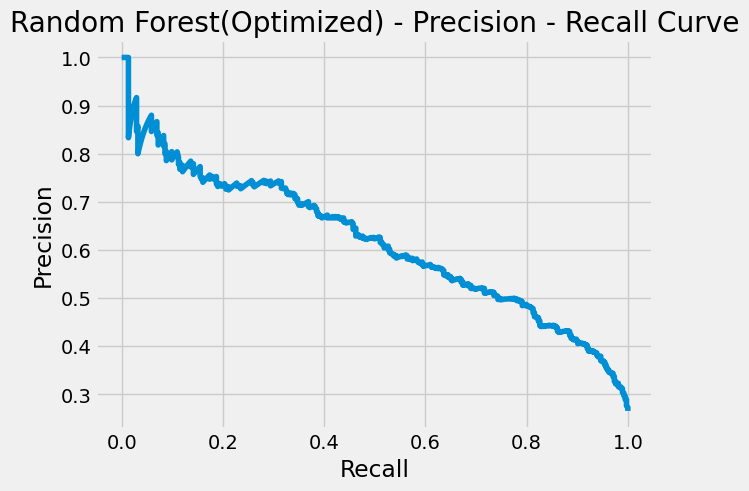

F1 Score: 0.5416036308623299 
AUC Score (PR): 0.616191450243944



In [59]:

confusion_matrix_plot(X_train, y_train,X_test, y_test, rf_random_grid, y_pred_ef_tunned, 'Random Forest(Optimized)')
roc_curve_auc_score(X_test, y_test, y_pred_rf_tunned_prob, 'Random Forest(Optimized)')
precision_recall_curve_and_score(X_test, y_test, y_pred_ef_tunned, y_pred_rf_tunned_prob, 'Random Forest(Optimized)')

**Support Vector Machine(Optimized)**

SVm best parameter: {'C': 0.30000000000000004} 



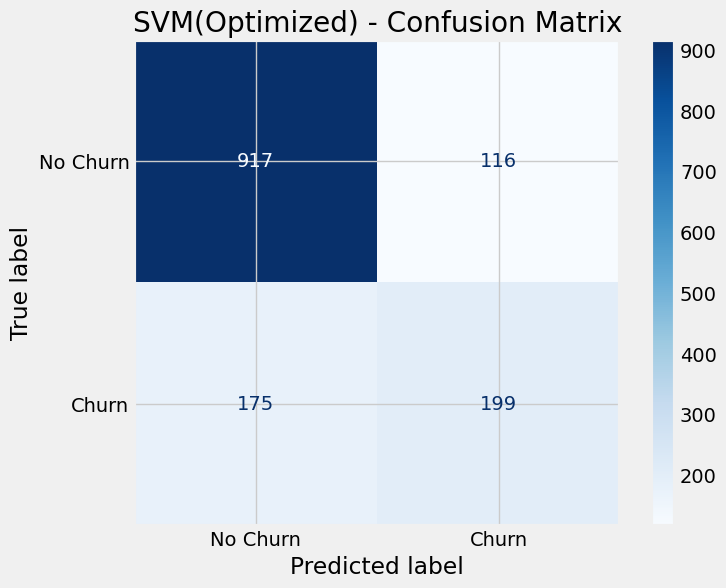

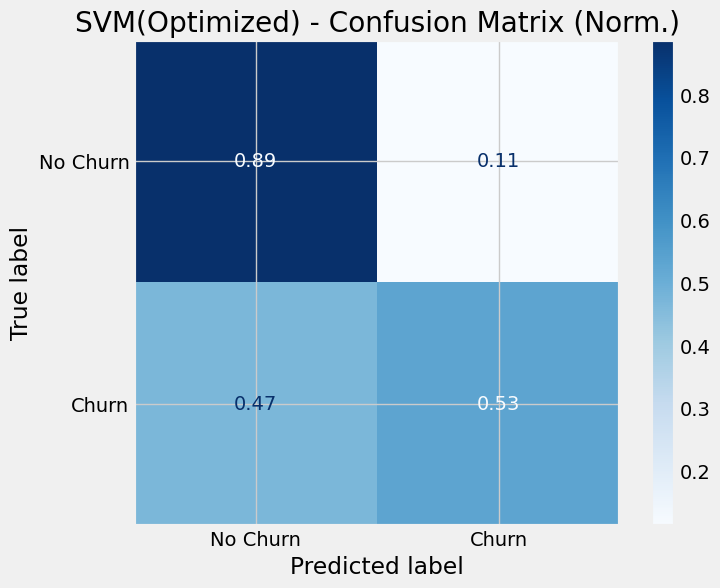

Accuracy Score Test: 0.7931769722814499
Accuracy Score Train: 0.8033777777777777 (as comparison)



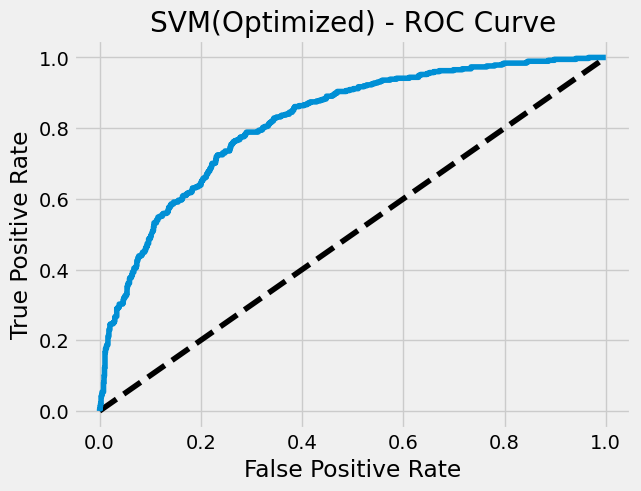

AUC Score (ROC): 0.8183267674754492



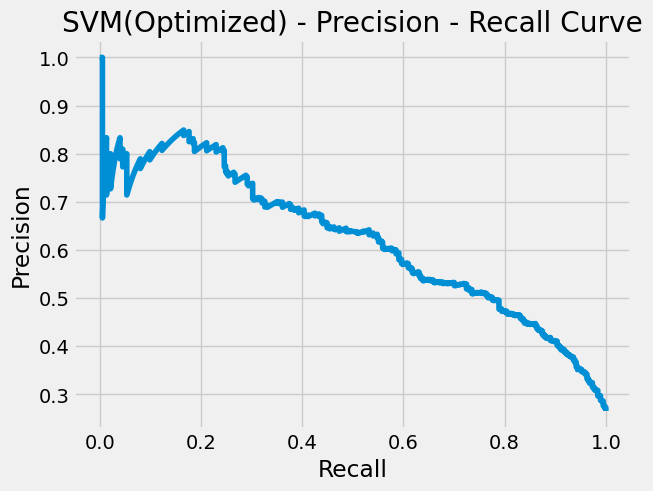

F1 Score: 0.5776487663280115 
AUC Score (PR): 0.6203990045838024



In [60]:

param_grid_svm = {'C': np.arange(.1,3,0.1)}
support_vector_m = SVC(kernel = 'linear', probability = True)
support_vector_m_tuned = GridSearchCV(support_vector_m, param_grid_svm, cv = 5)
support_vector_m_tuned.fit(X_train, y_train)

y_pred_svm_tunned = support_vector_m_tuned.predict(X_test)
y_pred_svm_tunned_prob = support_vector_m_tuned.predict_proba(X_test)

print('SVm best parameter:', support_vector_m_tuned.best_params_, '\n')


confusion_matrix_plot(X_train, y_train,X_test, y_test, support_vector_m_tuned, y_pred_svm_tunned, 'SVM(Optimized)')
roc_curve_auc_score(X_test, y_test, y_pred_svm_tunned_prob, 'SVM(Optimized)')
precision_recall_curve_and_score(X_test, y_test, y_pred_svm_tunned, y_pred_svm_tunned_prob, 'SVM(Optimized)')

***Summary***

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score,classification_report
import time
#,plot_roc_curve, ,


In [74]:
classifiers = [KNeighborsClassifier(n_neighbors= 24),LogisticRegression(solver = 'saga', max_iter = 1000,C= 1.3000000000000003, penalty= 'l1'),
              RandomForestClassifier(n_estimators= 1971, max_features= 'auto', max_depth= 60, criterion= 'entropy', bootstrap= True),
              SVC(kernel = 'linear', probability = True,C= 0.30000000000000004),
              DecisionTreeClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=5, min_samples_leaf=1,min_samples_split=3, random_state=42, splitter='best'),
              AdaBoostClassifier(n_estimators=200, estimator=None,learning_rate=0.1),
              GradientBoostingClassifier(learning_rate=0.05, max_depth=1, n_estimators=100, min_samples_split=3, max_leaf_nodes=5,subsample=0.6),
              XGBClassifier(gamma=3, learning_rate = 0.05, max_depth = 3, min_child_weight = 1,n_estimators=100,subsample=0.6)]

metric_values = []
for model in classifiers:
    start_time = time.time()
    model.fit(X_train, y_train)
    model_name = type(model).__name__
    train_time = time.time()-start_time
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_test)
    train_precision = precision_score(y_train, y_train_pred)
    val_precision = precision_score(y_test, y_val_pred)
    train_recall = recall_score(y_train, y_train_pred)
    val_recall = recall_score(y_test, y_val_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_test, y_val_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    val_f1 = f1_score(y_test, y_val_pred)
    train_auc = roc_auc_score(y_train, y_train_pred)
    val_auc = roc_auc_score(y_test, y_val_pred)
    metric_value = [model_name,train_time,train_precision,val_precision,train_recall,val_recall,train_accuracy,val_accuracy,train_f1,val_f1,train_auc,val_auc]
    metric_values.append(metric_value)

col_name = ['Model','Time to Train','Training Precision','Validation Precision','Training Recall','Validation Recall','Training Accuracy','Validation Accuracy','Training F1 Score','Validation F1 Score','Training ROC_AUC Score','Validation ROC_AUC Score']
df_metric = pd.DataFrame(metric_values,columns=col_name)
df_metric

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Time to Train,Training Precision,Validation Precision,Training Recall,Validation Recall,Training Accuracy,Validation Accuracy,Training F1 Score,Validation F1 Score,Training ROC_AUC Score,Validation ROC_AUC Score
0,KNeighborsClassifier,0.003935,0.649606,0.571429,0.551839,0.513369,0.801778,0.768301,0.596745,0.540845,0.722046,0.686985
1,LogisticRegression,0.385767,0.665345,0.627451,0.561204,0.513369,0.808356,0.789623,0.608853,0.564706,0.729512,0.701505
2,RandomForestClassifier,15.981207,0.995321,0.633218,0.995987,0.489305,0.997689,0.788913,0.995654,0.552036,0.997146,0.693346
3,SVC,5.537529,0.653029,0.631746,0.555184,0.532086,0.803378,0.793177,0.600145,0.577649,0.724202,0.709896
4,DecisionTreeClassifier,0.012097,0.000000,0.000000,0.000000,0.000000,0.734222,0.734186,0.000000,0.000000,0.500000,0.500000
5,AdaBoostClassifier,1.866559,0.684896,0.648352,0.527759,0.473262,0.809956,0.791756,0.596147,0.547141,0.719933,0.690164
6,GradientBoostingClassifier,0.576421,0.707733,0.703297,0.361204,0.342246,0.790578,0.786780,0.478299,0.460432,0.653604,0.644986
7,XGBClassifier,1.608630,0.688648,0.653137,0.551839,0.473262,0.814578,0.793177,0.612700,0.548837,0.730762,0.691132


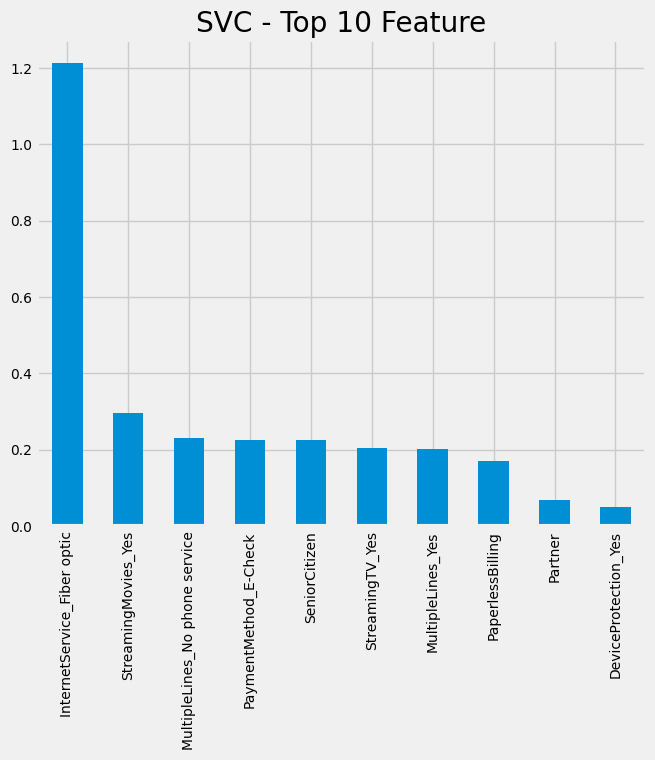

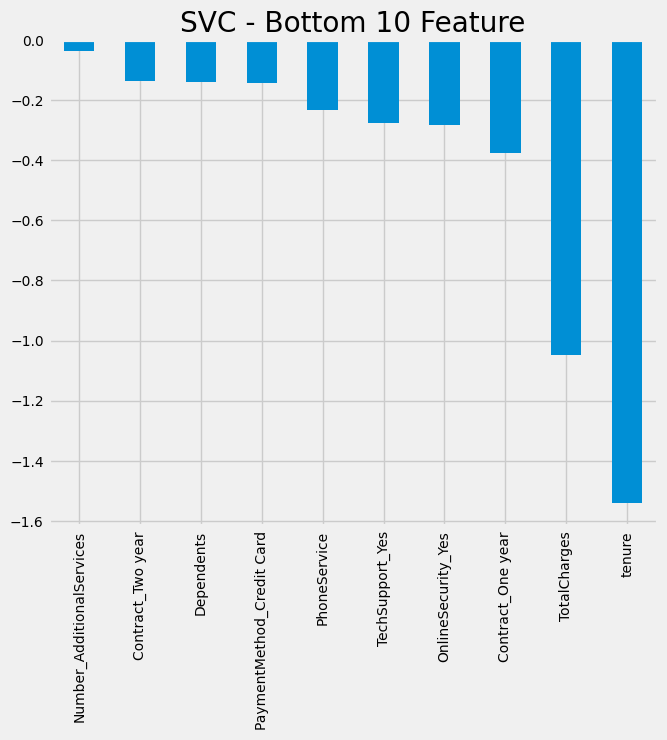

In [73]:

support_vector_1 = SVC(kernel = 'linear', probability = True,C= 0.30000000000000004)
support_vector_1.fit(X_train, y_train)

y_pred_svm_1 = support_vector_1.predict(X_test)


feature_weights(X1, support_vector_1, 'SVC')